In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("white")
import math
import warnings
warnings.filterwarnings('ignore')

from scipy.spatial import distance
from scipy import linalg

In [2]:
# Function for creating datapoints in the form of a circle
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500,1000), dtype=float)
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

X = df.values
print(X.shape)

(2300, 2)


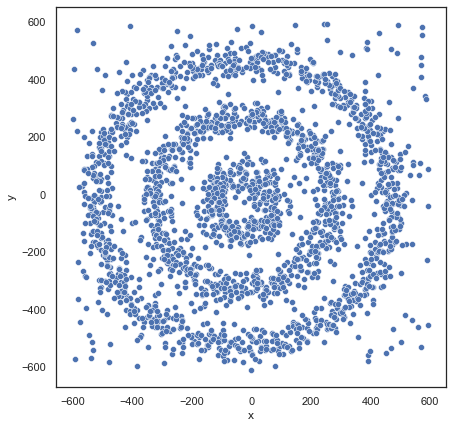

In [3]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
dist_pairs = distance.cdist(X, X, metric="sqeuclidean")
print(dist_pairs.shape)

(2300, 2300)


In [5]:
gamma = 1
n = 2300
W = np.exp(-gamma * dist_pairs)

In [6]:
degrees = W.sum(axis=1)
print(degrees.shape)

(2300,)


In [7]:
D = np.zeros((n,n))
for i in range(n):
    D[i][i] = degrees[i]

In [8]:
L = D-W
evals, evecs = linalg.eig(L, left=False, right=True)
evals = np.real(evals)
evecs = np.real(evecs)

In [96]:
sort_idxs = np.argsort(evals)
evals = evals[sort_idxs]
evecs = evecs[:,sort_idxs]
for ev in evals:
    print(ev)

-1.203770473883564e-16
-1.1297032128913988e-16
-1.1105867522608006e-16
-1.1035170569587124e-16
-1.0992830064499262e-16
-1.0992726784057978e-16
-1.0491909060653483e-16
-1.0407063274670936e-16
-1.0345860562540734e-16
-1.0307413937489768e-16
-1.0185247666452387e-16
-1.0090700456016395e-16
-1.0059796133033798e-16
-9.975637954563644e-17
-9.801097127286256e-17
-9.77464836267067e-17
-9.576886588054259e-17
-9.566967924686899e-17
-9.554780282945861e-17
-9.395521925315844e-17
-9.391163238104555e-17
-9.357367859259158e-17
-9.262614722444591e-17
-9.251587334322368e-17
-9.16144921512605e-17
-9.073772046709577e-17
-9.040327059508014e-17
-8.996032694688303e-17
-8.929143880901909e-17
-8.885713479451149e-17
-8.712305671067964e-17
-8.680403716271596e-17
-8.66894782523263e-17
-8.638085373895302e-17
-8.280206456163201e-17
-8.26747340419112e-17
-8.247209952018187e-17
-8.042201965200177e-17
-7.992260881885715e-17
-7.845507372809875e-17
-7.80456157522421e-17
-7.322024585541015e-17
-7.108728200851427e-17
-7.0

1.9612014021542007e-23
2.031186579443275e-23
2.031186579443275e-23
2.1120098762325335e-23
2.1120098762325335e-23
2.2039901136558223e-23
2.438832810023548e-23
2.4805270861946528e-23
2.4846518331538636e-23
2.4846518331538636e-23
2.6246439878139407e-23
2.834809479099276e-23
2.929385998217736e-23
2.93235407306158e-23
3.061198521138376e-23
3.061198521138376e-23
3.133907953962686e-23
3.248377042986806e-23
3.585131880911139e-23
3.585131880911139e-23
3.942840188122459e-23
4.4015228367766184e-23
4.5612385192562056e-23
4.623189988352794e-23
4.890799127848486e-23
4.890799127848486e-23
5.333399346146468e-23
5.333399346146468e-23
6.353544683664472e-23
7.04480708568422e-23
7.166516314618274e-23
7.600764302065405e-23
8.901037442299595e-23
8.901037442299595e-23
9.008083731929722e-23
9.008083731929722e-23
9.064263932280626e-23
9.111233655658033e-23
9.111233655658033e-23
9.43549120221219e-23
9.43549120221219e-23
9.520290276437581e-23
1.0195171104859633e-22
1.0195171104859633e-22
1.0292472931440805e-22
1

In [9]:
labels2 = KMeans(n_clusters=3).fit_predict(evecs[:,0:3])
print(labels2)

[0 0 0 ... 0 0 0]


<AxesSubplot:>

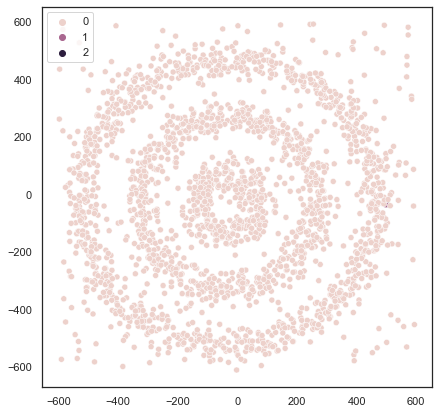

In [10]:
sns.scatterplot(X[:,0], X[:, 1], hue=labels2)

In [99]:
chol = linalg.cholesky(L)

LinAlgError: 1-th leading minor of the array is not positive definite